In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [71]:
IMAGE_SIZE=256
BATCH_SIZE=32
train_=0.8
val_=0.1
CHANNELS=3
EPOCHS=30

In [72]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/Colab Notebooks',
     shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE
)
classes=data.class_names

Found 2137 files belonging to 3 classes.


In [73]:
train_data=data.take(int(train_*len(data)))
valid_data=data.skip(int(train_*len(data))).take(int(val_*len(data)))
test_data=data.skip(int(train_*len(data))).skip(int(val_*len(data)))

In [74]:
resize=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

In [75]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [76]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax'),
])
model.build(input_shape=input_shape)

In [77]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_13 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [78]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [79]:
history=model.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=valid_data,
    epochs=EPOCHS
)

Epoch 1/30
53/53 [==============================] - 13s 164ms/step - loss: 0.9085 - accuracy: 0.5024 - val_loss: 0.8588 - val_accuracy: 0.5729
Epoch 2/30
53/53 [==============================] - 9s 151ms/step - loss: 0.7355 - accuracy: 0.6627 - val_loss: 0.6130 - val_accuracy: 0.7656
Epoch 3/30
53/53 [==============================] - 9s 165ms/step - loss: 0.5145 - accuracy: 0.7860 - val_loss: 0.4317 - val_accuracy: 0.7656
Epoch 4/30
53/53 [==============================] - 8s 148ms/step - loss: 0.3464 - accuracy: 0.8544 - val_loss: 0.2537 - val_accuracy: 0.9115
Epoch 5/30
53/53 [==============================] - 9s 168ms/step - loss: 0.2769 - accuracy: 0.8921 - val_loss: 0.2742 - val_accuracy: 0.9115
Epoch 6/30
53/53 [==============================] - 9s 163ms/step - loss: 0.2148 - accuracy: 0.9210 - val_loss: 0.1516 - val_accuracy: 0.9323
Epoch 7/30
53/53 [==============================] - 8s 135ms/step - loss: 0.1836 - accuracy: 0.9216 - val_loss: 0.3324 - val_accuracy: 0.9167
Epoch

In [80]:
results=model.evaluate(test_data)

8/8 [==============================] - 4s 31ms/step - loss: 0.1378 - accuracy: 0.9518


In [81]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 53}

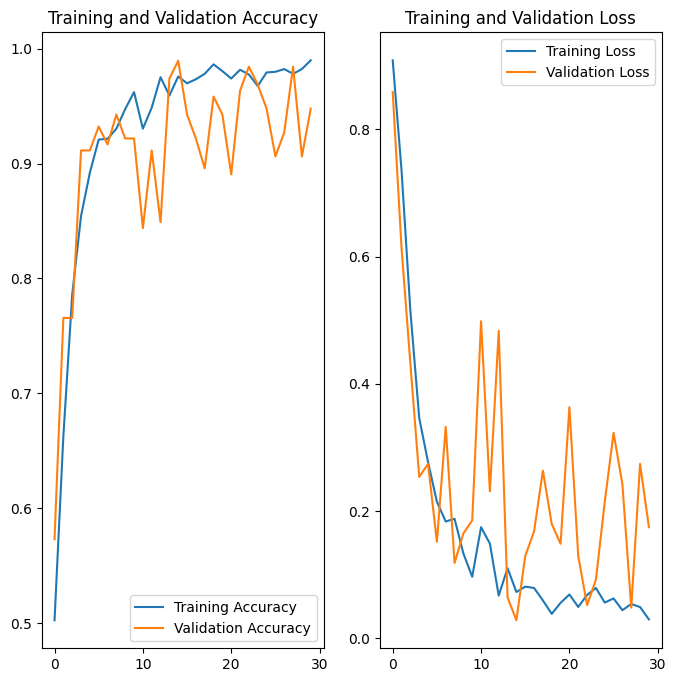

In [92]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [93]:
def prediction(model,image_input):
  img_array=tf.keras.preprocessing.image.img_to_array(image_input.numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  class_name=classes[np.argmax(predictions)]
  confidence=round(100*(np.max(predictions)),2)
  return class_name,confidence

1/1 [==============================] - 0s 34ms/step


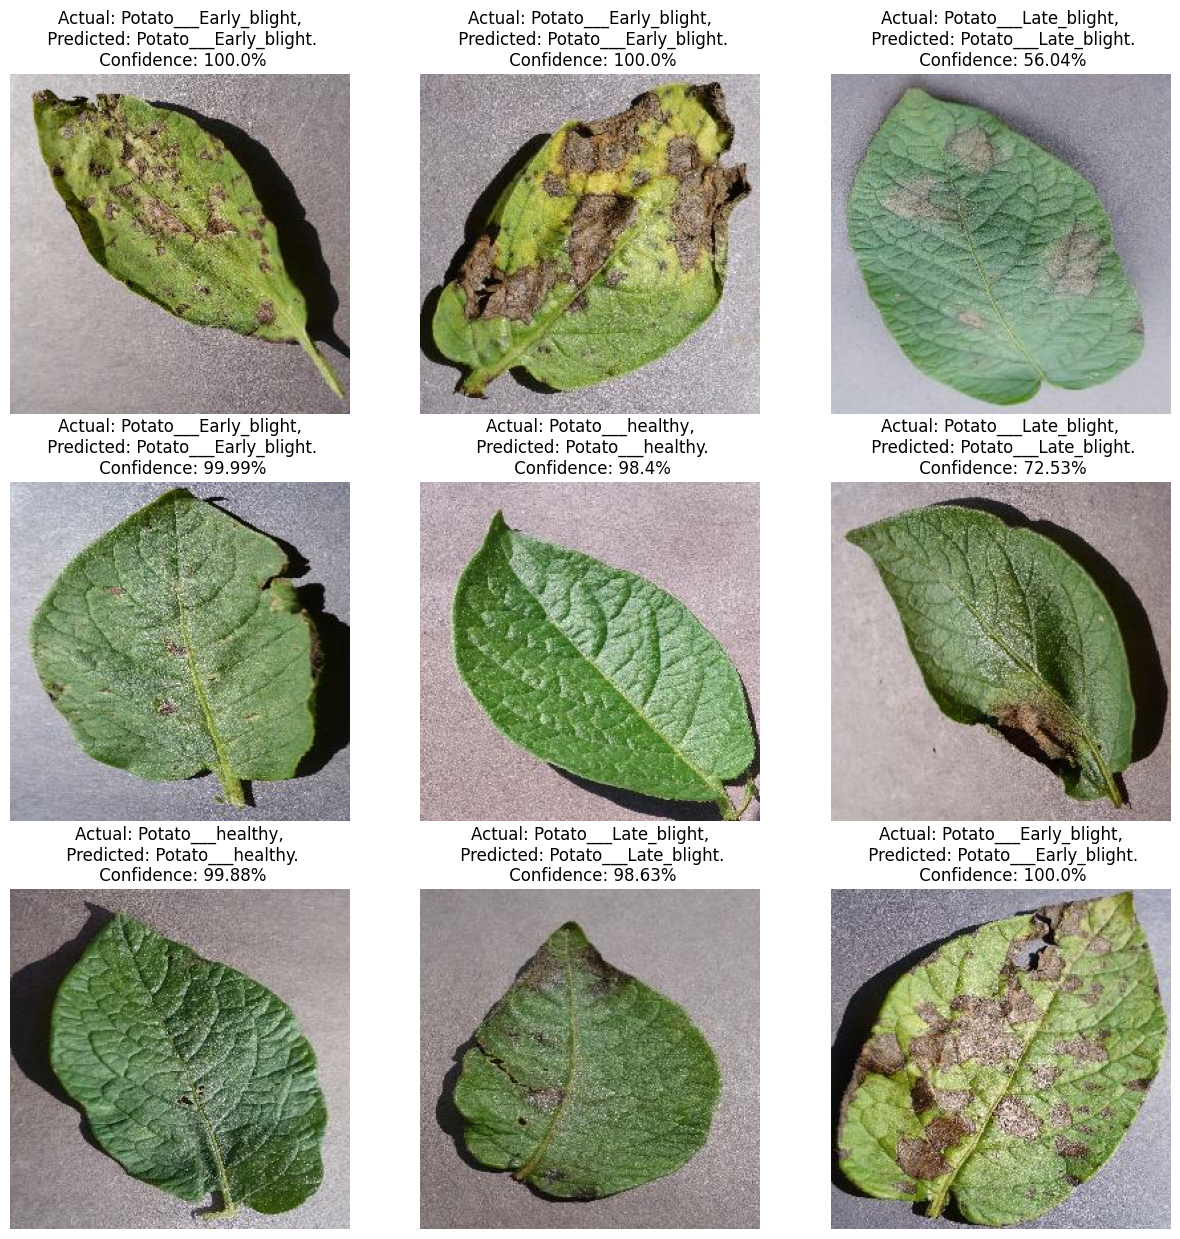

In [97]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = prediction(model, images[i])
        actual_class = classes[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")